In [2]:
import os
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
from astropy.coordinates import Angle

In [5]:
current_path = os.getcwd()
filename     = current_path + '/test_data/full_ring_reco_pos_charge_daq.npz'
d            = np.load(filename)
df           = pd.DataFrame({})
for (key, vals) in d.items():
    df[key] = vals
df.head()

,a_reco_r1,a_reco_phi1,a_reco_z1,a_reco_r2,a_reco_phi2,a_reco_z2,a_charges1,a_charges2,a_sensors1,a_sensors2,a_touched_sipms1,a_touched_sipms2,a_sns_response1,a_sns_response2,a_first_sipm1,a_first_time1,a_first_sipm2,a_first_time2,a_event_ids
0,179.233398,1.958647,-53.401672,173.885727,-1.199272,29.207228,"[191, 138, 14, 12, 49, 72, 25, 40, 81, 16, 30,...","[26, 6, 10, 14, 31, 27, 27, 24, 22, 25, 29, 15...","[1362, 1187, 1536, 1012, 1359, 1188, 1184, 136...","[3374, 3019, 3369, 3022, 3198, 3547, 3721, 319...",48,118,1059,1208,1362,307508451,3374,307508641,766.0
1,185.014938,-0.050292,-26.804808,179.747864,2.922910,18.593750,"[32, 146, 148, 83, 105, 70, 38, 11, 21, 43, 52...","[54, 49, 48, 45, 25, 10, 27, 12, 21, 39, 19, 4...","[2182, 2180, 2005, 2004, 2179, 2355, 1829, 252...","[3137, 3313, 3139, 2963, 2964, 2965, 2788, 314...",36,63,1243,1017,2182,745015877,3137,745015982,1818.0
2,177.642242,2.786661,4.703749,174.067230,-0.323640,-14.051161,"[52, 31, 58, 16, 51, 12, 51, 30, 29, 12, 24, 2...","[42, 15, 28, 15, 26, 10, 14, 18, 27, 4, 11, 25...","[2608, 2960, 2609, 2787, 2784, 2257, 2783, 278...","[2522, 2873, 2698, 1822, 2349, 2868, 2700, 217...",98,123,1316,1287,2608,767517441,2522,767517426,1876.0
3,178.916107,-2.059778,-18.145134,178.606171,1.092907,15.391026,"[55, 35, 13, 77, 61, 45, 26, 27, 25, 31, 6, 13...","[51, 26, 45, 20, 14, 29, 38, 21, 40, 13, 11, 3...","[2298, 2473, 1772, 2123, 2124, 2474, 1947, 265...","[3436, 3259, 3261, 2738, 3613, 3612, 3088, 343...",73,74,1211,1276,2298,775016839,3436,775016934,1899.0
4,191.046356,-0.370060,52.858828,177.803574,2.792550,-39.098896,"[686, 88, 93, 135, 3, 141, 31, 12, 3, 3, 20, 2...","[26, 28, 35, 28, 48, 8, 37, 46, 30, 5, 43, 26,...","[4096, 3921, 4097, 4271, 4446, 4095, 4270, 392...","[1911, 1907, 1735, 1909, 1559, 1563, 1733, 173...",14,77,1244,1132,4096,877510843,1911,877510908,2175.0


In [6]:
def get_matrix_sipms(init_sipm, num_sipms, num_cols, sipms_per_row, sns1, sns2, q1, q2):
    SiPM_Matrix = np.reshape(np.arange(init_sipm, init_sipm + num_sipms), (num_cols, sipms_per_row))
    phi_o       = np.zeros(SiPM_Matrix.shape)
    sensors     = np.concatenate((sns1, sns2))
    charges     = np.concatenate((q1, q2))
    
    for sns, ch in zip(sensors, charges):
        i, j = np.where(SiPM_Matrix == sns)
        phi_o[i,j] = ch
    
    return phi_o

In [7]:
df.a_charges2.iloc[4]

array([26, 28, 35, 28, 48,  8, 37, 46, 30,  5, 43, 26, 17,  9, 36, 41, 11,
       26,  8,  4,  9, 14, 13, 16, 15,  7,  8, 18, 10, 13,  4, 24,  9,  9,
       12, 13,  9,  8, 26, 22,  3, 26, 29, 19, 28,  3,  5, 21,  3, 17,  9,
       10, 12,  4,  3,  9, 10, 12, 10, 14,  9, 12,  8,  7,  4,  3,  4,  4,
        7,  5, 16,  3,  6,  3,  6,  8,  9])

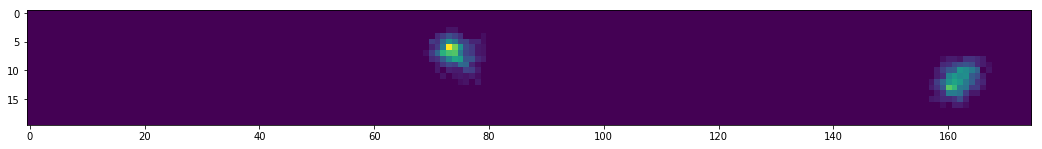

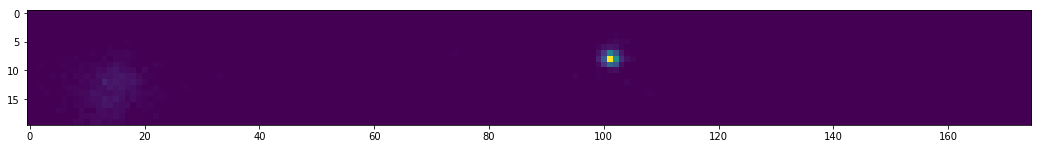

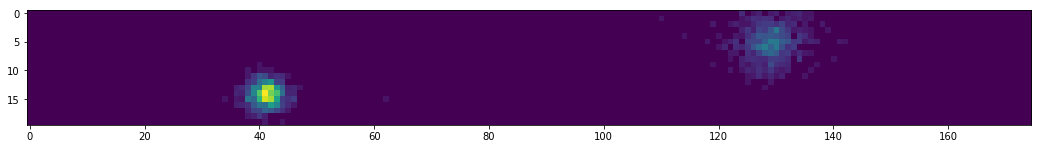

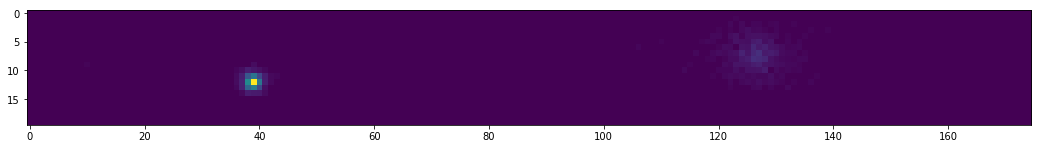

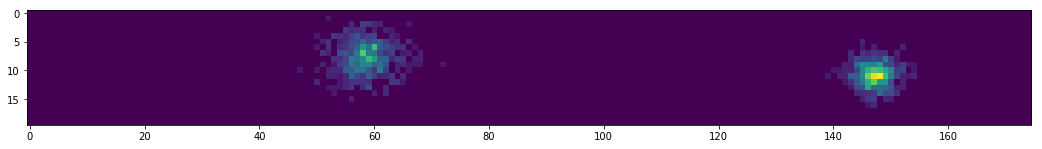

In [9]:
beautiful_events = [3, 14, 62, 71, 89]
for i in beautiful_events:
#for i in range(20):
    phi_o = get_matrix_sipms(1000, 3500, 20, 175, 
                             df.a_sensors1.iloc[i], 
                             df.a_sensors2.iloc[i], 
                             df.a_charges1.iloc[i], 
                             df.a_charges2.iloc[i])
    fig = plt.figure(figsize=(18,8))
    plt.imshow(phi_o)
    plt.show()